In [2]:
%matplotlib notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
def count_set_bits(input):
    return (input & 0x01) + ((input & 0x02) >> 1) + ((input & 0x04) >> 2) +  ((input & 0x08)>>3) + ((input & 0x10)>>4) +((input & 0x20) >>5)+((input & 0x40)>>6) + ((input & 0x80)>>7)

def compare_bytearray(b1,b2):
    diffCnt = 0	
    for (a, b) in zip(b1,b2):
        diff = a^b
        diffCnt = diffCnt + count_set_bits(diff)
    return diffCnt

size=1024
dataCmp = bytearray(size-4)

In [19]:
from scapy.all import *                                                                                                                                                  

scapy_cap = rdpcap('./dump04_filtered.pcap')
timestamps = []
dBm_antSignals = []
diffs = []

for packet in scapy_cap:
    #print(packet.show())
    #print(packet.load)
    #break
    #print(packet[RadioTap].ChannelFrequency)
    #print(packet[RadioTap].dBm_AntSignal)
    if packet[Dot11FCS].addr3 == '13:22:33:44:55:66':
        #print(packet.time, packet[RadioTap].dBm_AntSignal)
        timestamps.append(packet.time)
        dBm_antSignals.append(packet.dBm_AntSignal)
        try:
            diff = int(compare_bytearray(packet.load, dataCmp))
            diffs.append(diff)
        except:
            diffs.append(-1)

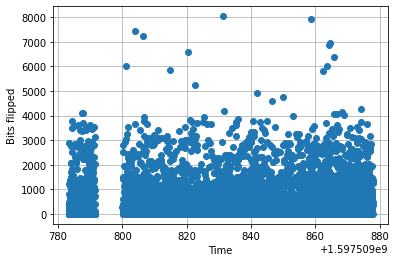

In [22]:
#plot(timestamps, dBm_antSignals)
plot(timestamps, diffs, 'o')

xlabel("Time")
ylabel("Bits flipped")
grid()

In [24]:
diffs = numpy.array(diffs)

In [27]:
numpy.average(diffs)

454.0229551451187

In [34]:
numpy.percentile(diffs, 90)

1400.1000000000004

(array([3.41796651e-03, 6.66359857e-04, 4.30836114e-04, 3.05278161e-04,
        2.15828377e-04, 1.73155086e-04, 1.52639080e-04, 1.44432678e-04,
        1.23916673e-04, 8.94497837e-05, 6.72924978e-05, 6.48305772e-05,
        4.75971326e-05, 3.77494500e-05, 5.08796935e-05, 3.69288098e-05,
        3.36462489e-05, 3.93907304e-05, 2.79017674e-05, 2.05160054e-05,
        1.31302435e-05, 1.31302435e-05, 1.47715239e-05, 9.84768261e-06,
        3.28256087e-06, 5.74448152e-06, 8.20640218e-07, 0.00000000e+00,
        8.20640218e-07, 8.20640218e-07, 8.20640218e-07, 0.00000000e+00,
        8.20640218e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.64128044e-06, 1.64128044e-06, 0.00000000e+00, 8.20640218e-07,
        0.00000000e+00, 8.20640218e-07, 8.20640218e-07, 8.20640218e-07,
        0.00000000e+00, 8.20640218e-07, 8.20640218e-07, 0.00000000e+00,
        0.00000000e+00, 1.64128044e-06]),
 array([-1.00000e+00,  1.59760e+02,  3.20520e+02,  4.81280e+02,
         6.42040e+02,  8.02800

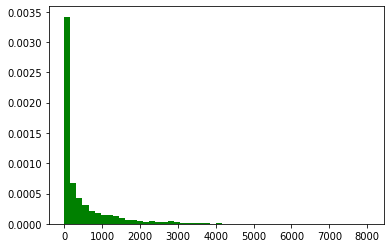

In [51]:
plt.hist(diffs, 50, density=True, facecolor='g')

In [46]:
len(diffs)

7580

In [53]:
numpy.count_nonzero(diffs==0)

1359

In [56]:
timestamps[-1] - timestamps[0]

Decimal('94.670684')

In [61]:
len(diffs) / (timestamps[-1] - timestamps[0]) * 8 # KiloBits per second

Decimal('640.5361980906359565332812003')